In [1]:
import praw

In [2]:
reddit = praw.Reddit(client_id='redacted',
                    client_secret= 'redacted',
                    user_agent='redacted',
                    username='redacted',
                    password='redacted',)

In [3]:
end_of_season_2223 = 1685418710
beginning_of_season2223 = 1659744000


In [4]:
submission_list_liverpool = [
    submission for submission in reddit.subreddit('LiverpoolFC').search('FT') if end_of_season_2223 >= submission.created_utc >= beginning_of_season2223 and submission.link_flair_text == 'Post Match'
]
submission_list_arsenal = [
    submission for submission in reddit.subreddit('Gunners').search('Post Match') if end_of_season_2223 >= submission.created_utc >= beginning_of_season2223 and submission.link_flair_text == 'Post-Match Thread'

]

submission_list_manunited = [
    submission for submission in reddit.subreddit('RedDevils').search('Post Match') if end_of_season_2223 >= submission.created_utc >= beginning_of_season2223

]

submission_list_mancity = [
    submission for submission in reddit.subreddit('MCFC').search('Post') if end_of_season_2223 >= submission.created_utc >= beginning_of_season2223 and submission.link_flair_text == 'Match Day'

]

submission_list_spurs = [
    submission for submission in reddit.subreddit('coys').search('post') if end_of_season_2223 >= submission.created_utc >= beginning_of_season2223 and submission.link_flair_text == 'PostMatch Thread'

]

submission_list_chelsea = [
    submission for submission in reddit.subreddit('chelseafc').search('post') if end_of_season_2223 >= submission.created_utc >= beginning_of_season2223 and submission.link_flair_text == 'Post-Match Thread'

]

In [5]:
import pandas as pd

def get_comment_data(end, beginning, submission_list):
    data = pd.DataFrame()

    for i in submission_list:
        submission = reddit.submission(i)
        finaltitle = i.title

        comment_data = []

        submission.comments.replace_more(limit=None)

        for comment in submission.comments.list():
            comment_data.append(str(comment.body))


        df = pd.DataFrame({finaltitle: comment_data})
        data = pd.concat([data, df], axis=1)
    return data


In [6]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [7]:
def get_mood_ratio(data):

    moodDF = pd.DataFrame()
    #for each column in the data
    for col in data.columns.dropna():
        col_list = []
        #for each comment in each column
        for comment in data[col].dropna():
            #split text into words'
            temp = comment.split(' ')
            #find length
            length = len(temp)
            #need to restrict length of paragraph so that the sentiment pipeline can work
            try:
                if length > 100:
                    new_comment = ' '.join(temp[:100])
                    sent = sentiment_pipeline(new_comment)
                    col_list.append(sent[0])

                else:
                    sent = sentiment_pipeline(comment)
                    col_list.append(sent[0])
            except RuntimeError:
                continue
        
        #
        moodDF.loc[:, col] = pd.Series(col_list)
        
        
    #cleaning moodDF, getting games out if there arent many comments
    new_moodDF = moodDF.copy()
    for column in new_moodDF.columns: 
        if new_moodDF[column].count() <= 7: 
            new_moodDF=new_moodDF.drop(column, axis=1) 
    
    #now making percentage
    percentage = pd.DataFrame()

    for col in new_moodDF.columns:
        num = 0
        num_negative = 0
        for item in new_moodDF[col].dropna():
            if item['label'] == 'NEGATIVE':
                num_negative += 1
            num += 1
        percentage[col] = [(num_negative/num)]
    
    return percentage


In [70]:
labels = ['Negativity Score', 'Result']

In [167]:
# liverpool_data2223 = get_comment_data(end_of_season_2223, beginning_of_season2223, submission_list_liverpool)
# liverpool_data2223.to_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\liverpool.csv')
#Above was done earlier and let run, but now I am accessing through the download


# liverpool_data2223 = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\liverpool.csv')
# liverpool_data2223 = liverpool_data2223.drop('Unnamed: 0', axis=1)
# liverpool_mood = get_mood_ratio(liverpool_data2223)
#Above was done earlier and let run, but now I am accessing through the download


liverpool_mood = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\liverpoolmood.csv')
liverpool_mood = liverpool_mood.drop('Unnamed: 0', axis=1)
liverpool_mood = liverpool_mood.transpose()
liverpool_mood.columns = labels


In [168]:
# arsenal_data2223 = get_comment_data(end_of_season_2223, beginning_of_season2223, submission_list_arsenal)
# arsenal_data2223.to_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\arsenal.csv')
#Above was done earlier and let run, but now I am accessing through the download

# arsenal_data2223 = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\arsenal.csv')
# arsenal_data2223 = arsenal_data2223.drop('Unnamed: 0', axis=1)
# arsenal_mood = get_mood_ratio(arsenal_data2223)
#Above was done earlier and let run, but now I am accessing through the download

arsenal_mood = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\arsenalmood.csv')
arsenal_mood = arsenal_mood.drop('Unnamed: 0', axis=1)
arsenal_mood = arsenal_mood.transpose()
arsenal_mood.columns = labels


In [169]:
# manunited_data2223 = get_comment_data(end_of_season_2223, beginning_of_season2223, submission_list_manunited)
# manunited_data2223.to_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\manunited.csv')
#Above was done earlier and let run, but now I am accessing through the download

# manunited_data2223 = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\manunited.csv')
# manunited_data2223 = manunited_data2223.drop('Unnamed: 0', axis=1)
# manunited_mood = get_mood_ratio(manunited_data2223)
#Above was done earlier and let run, but now I am accessing through the download

manunited_mood = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\manunitedmood.csv')
manunited_mood = manunited_mood.drop('Unnamed: 0', axis=1)
manunited_mood = manunited_mood.transpose()
manunited_mood.columns = labels


In [170]:
# mancity_data2223 = get_comment_data(end_of_season_2223, beginning_of_season2223, submission_list_mancity)
# mancity_data2223.to_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\mancity.csv')
#Above was done earlier and let run, but now I am accessing through the download

# mancity_data2223 = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\mancity.csv')
# mancity_data2223 = mancity_data2223.drop('Unnamed: 0', axis=1)
# mancity_mood = get_mood_ratio(mancity_data2223)
#Above was done earlier and let run, but now I am accessing through the download

mancity_mood = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\mancitymood.csv')
mancity_mood = mancity_mood.drop('Unnamed: 0', axis=1)
mancity_mood = mancity_mood.transpose()
mancity_mood.columns = labels


In [171]:
# spurs_data2223 = get_comment_data(end_of_season_2223, beginning_of_season2223, submission_list_spurs)
# spurs_data2223.to_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\spurs.csv')
#Above was done earlier and let run, but now I am accessing through the download

# spurs_data2223 = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\spurs.csv')
# spurs_data2223 = spurs_data2223.drop('Unnamed: 0', axis=1)
# spurs_mood = get_mood_ratio(spurs_data2223)

spurs_mood = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\spursmood.csv')
spurs_mood = spurs_mood.drop('Unnamed: 0', axis=1)
spurs_mood = spurs_mood.transpose()
spurs_mood.columns = labels


In [172]:
# chelsea_data2223 = get_comment_data(end_of_season_2223, beginning_of_season2223, submission_list_chelsea)
# chelsea_data2223.to_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\chelsea.csv')
#Above was done earlier and let run, but now I am accessing through the download

# chelsea_data2223 = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\chelsea.csv')
# chelsea_data2223 = chelsea_data2223.drop('Unnamed: 0', axis=1)
# chelsea_mood = get_mood_ratio(chelsea_data2223)
#Above was done earlier and let run, but now I am accessing through the download

chelsea_mood = pd.read_csv(r'C:\Users\mjjyo\OneDrive\Desktop\soccermooddata\chelseamood.csv')
chelsea_mood = chelsea_mood.drop('Unnamed: 0', axis=1)
chelsea_mood = chelsea_mood.transpose()
chelsea_mood.columns = labels


In [128]:
def means_per_score(data):
    means = {}
    results = data['Result']
    for i in range(len(results)):
        result = results[i]
        if result not in means:
            means[result] = [data['Negativity Score'][i]]
        else:
            means[result].append(data['Negativity Score'][i])
    return means

In [149]:
from statistics import mean


In [130]:
import matplotlib.pyplot as plt
import numpy as np

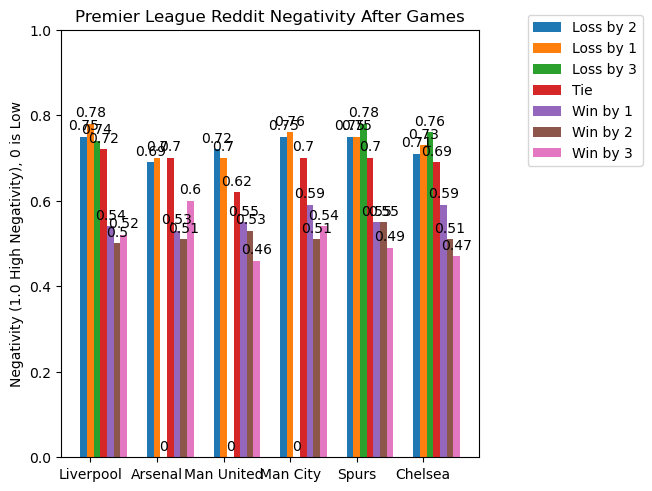

In [166]:
teams = ('Liverpool', 'Arsenal', 'Man United',
        'Man City', 'Spurs', 'Chelsea')

def return_mean(data, score):
    try:
        return round(mean(means_per_score(data)[score]),2)
    except KeyError:
        return 0


team_means = {
    'Loss by 2': (return_mean(liverpool_mood, -2.0),
                  return_mean(arsenal_mood, -2.0),
                  return_mean(manunited_mood, -2.0),
                  return_mean(mancity_mood, -2.0),
                  return_mean(spurs_mood, -2.0),
                  return_mean(chelsea_mood, -2.0),
                 ),  
    
    'Loss by 1': (return_mean(liverpool_mood, -1.0),
                  return_mean(arsenal_mood, -1.0),
                  return_mean(manunited_mood, -1.0),
                  return_mean(mancity_mood, -1.0),
                  return_mean(spurs_mood, -1.0),
                  return_mean(chelsea_mood, -1.0),
                 ),  
    'Loss by 3': (return_mean(liverpool_mood, -3.0),
                  return_mean(arsenal_mood, -3.0),
                  return_mean(manunited_mood, -3.0),
                  return_mean(mancity_mood, -3.0),
                  return_mean(spurs_mood, -3.0),
                  return_mean(chelsea_mood, -3.0),
                 ),  
 
    'Tie': (return_mean(liverpool_mood, 0),
                  return_mean(arsenal_mood, 0),
                  return_mean(manunited_mood, 0),
                  return_mean(mancity_mood, 0),
                  return_mean(spurs_mood, 0),
                  return_mean(chelsea_mood, -0),
                 ), 
    'Win by 1': (return_mean(liverpool_mood, 1.0),
                  return_mean(arsenal_mood, 1.0),
                  return_mean(manunited_mood, 1.0),
                  return_mean(mancity_mood, 1.0),
                  return_mean(spurs_mood, 1.0),
                  return_mean(chelsea_mood, 1.0),
                 ),  
    'Win by 2': (return_mean(liverpool_mood, 2.0),
                  return_mean(arsenal_mood, 2.0),
                  return_mean(manunited_mood, 2.0),
                  return_mean(mancity_mood, 2.0),
                  return_mean(spurs_mood, 2.0),
                  return_mean(chelsea_mood, 2.0),
                 ),  
    'Win by 3': (return_mean(liverpool_mood, 3.0),
                  return_mean(arsenal_mood, 3.0),
                  return_mean(manunited_mood, 3.0),
                  return_mean(mancity_mood, 3.0),
                  return_mean(spurs_mood, 3.0),
                  return_mean(chelsea_mood, 3.0),
                 ),  
    
}

x = np.arange(len(teams))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in team_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Negativity (1.0 High Negativity), 0 is Low')
ax.set_title('Premier League Reddit Negativity After Games')
ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylim(0, 1)

plt.show()
